In [3]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sympy as s
from sympy import Matrix, diff, acos
from sympy import lambdify

## Exercise 2

$$ f = ma$$
$$ f = m \dot{v}, ~ m = 1$$
$$f = \dfrac{dv}{dt}$$
$$dv = f dt$$
$$v = ft + C,~ v(t=0) = 0$$
$$v (t = 0) = \sum^{10}_{i} f_i$$

$$a = \dfrac{f}{m}$$
$$x(t) = v_0 + \dfrac{a t^2}{2} = \sum^{10}_i f_i (\dfrac{10}{2} - i)$$

In [4]:
A = np.array([[9.5, 8.5, 7.5, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, 0.5], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

We need to minimize norm


$$|f| \rightarrow min$$
$$ U\Sigma V^T f = a $$
$$ \Sigma V^T f = U^Ta $$

$\Rightarrow |\bar f| = |V^Tf| = |f|$ and $|\bar a| = |U^Ta| = |a|$.

$$\Sigma \bar f = \bar a$$

In [30]:
u, sigma, vt = np.linalg.svd(A, full_matrices=True)

In [31]:
u, sigma, vt

(array([[-0.98872048, -0.14977252],
        [-0.14977252,  0.98872048]]),
 array([18.44109698,  1.55754364]),
 array([[-0.51746472, -0.46384966, -0.41023461, -0.35661955, -0.30300449,
         -0.24938943, -0.19577437, -0.14215932, -0.08854426, -0.0349292 ],
        [-0.27871995, -0.18256051, -0.08640107,  0.00975837,  0.10591781,
          0.20207725,  0.29823669,  0.39439613,  0.49055557,  0.586715  ],
        [-0.40996244, -0.13321446,  0.88908532, -0.09553988, -0.08016508,
         -0.06479029, -0.04941549, -0.03404069, -0.01866589, -0.0032911 ],
        [-0.37032722, -0.03541156, -0.09960334,  0.90763114, -0.08513438,
         -0.07789989, -0.07066541, -0.06343093, -0.05619645, -0.04896196],
        [-0.330692  ,  0.06239134, -0.088292  , -0.08919783,  0.90989633,
         -0.0910095 , -0.09191533, -0.09282117, -0.093727  , -0.09463283],
        [-0.29105679,  0.16019424, -0.07698066, -0.08602681, -0.09507296,
          0.89588089, -0.11316526, -0.1222114 , -0.13125755, -0.1403037

In [32]:
a_ = u.T @ np.array([[1], [0]]) #since sigma has only two diag elements we can get the result with only two elems of f bar

In [33]:
sigma = np.diag(sigma)

In [34]:
reduced_fbar = np.linalg.solve(sigma, a_)

In [35]:
fbar = np.concatenate((reduced_fbar, np.reshape(np.zeros(8), (8,1))))

In [36]:
print(fbar)
fbar_norm = np.sqrt(fbar.T @ fbar)

[[-0.05361506]
 [-0.09615944]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]


In [39]:
f = vt.T @ fbar
f_norm = np.sqrt(f.T @ f)
f

In [41]:
np.isclose(f_norm, fbar_norm) #everything is alright!

In [43]:
#check final result:
print(A @ f) 

[[ 1.00000000e+00]
 [-5.55111512e-17]]


Here one can easily see that we got correct result. e-17 is machine zero

## Exercise 3

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)

In [215]:
def f(x):
    return 10 * np.sin(x)

def poly1(x, w0, w1):
    return w0 + w1 * x

def poly2(x, w0, w1, w2, w3):
    return w0 + w1 * x + w2 * (x ** 2) + w3 * (x ** 3)

In [247]:
#in docs range can be [low, high) or [low, high] depending on rounding. 
x = np.random.uniform(0,6,7)
func = 10*np.sin(x)
#it's impossible to tell due to the floating point precision
errors = np.random.normal(size=7)
y = func + errors
x, y = zip(*sorted(zip(x, y)))

In [248]:
x_1 = np.linspace(0, 6, 50)
x_ls = list(x)
popt1, pcov1 = curve_fit(poly1, x_ls, y)
popt2, pcov2 = curve_fit(poly2, x_ls, y)

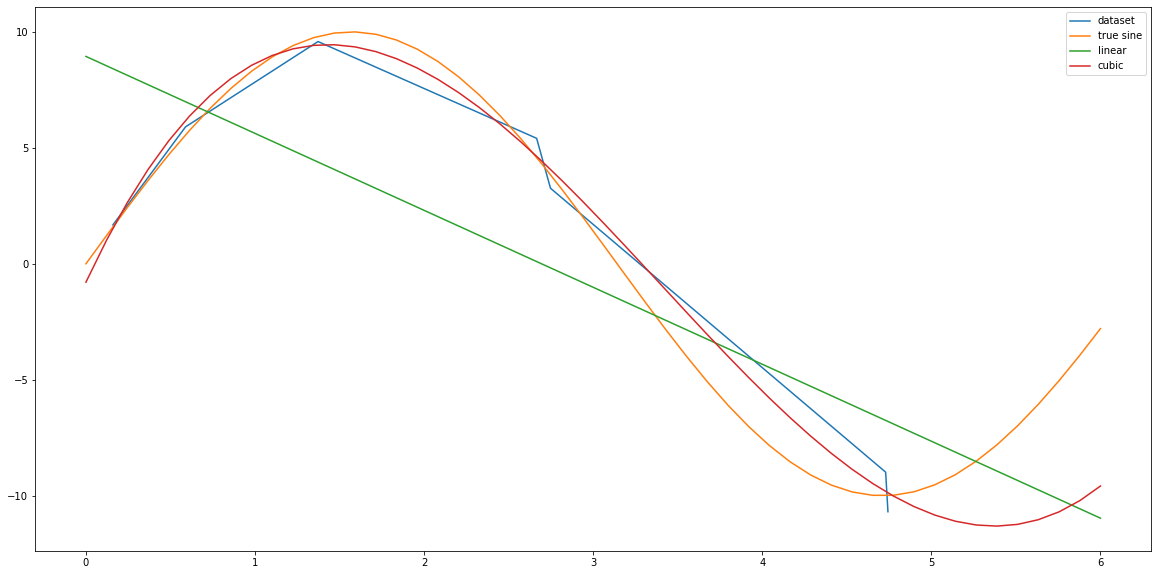

In [249]:
plt.plot(x,y, label='dataset')
plt.plot(x_1, f(x_1), label='true sine')
plt.plot(x_1, poly1(x_1, *popt1), label='linear')
plt.plot(x_1, poly2(x_1, *popt2), label='cubic')
plt.legend()

## Exercise 4

In [69]:
with np.load('data.npz') as data:
    A, C = data['A'], data['C']

In [3]:
def mat2vec(A):
    h, w = A.shape
    a = np.zeros(h*w, dtype = A.dtype)
    A = np.flipud(A)
    for i, row in enumerate(A):
        a [i * w : i * w + w] = row
    return a

def vec2mat(a, shape):
    h, w = shape
    A = np.zeros(shape, dtype = a.dtype )
    for i in range ( h ):
        A [i,:] = a[ i * w : i * w + w]
    return np.flipud( A )

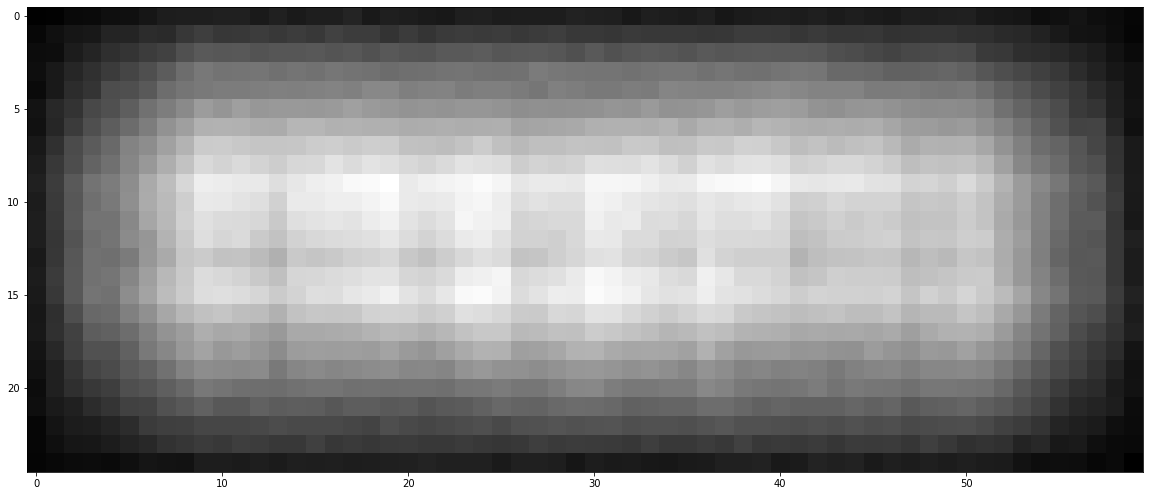

In [4]:
#plot image A
plt.imshow(A, cmap='gray')

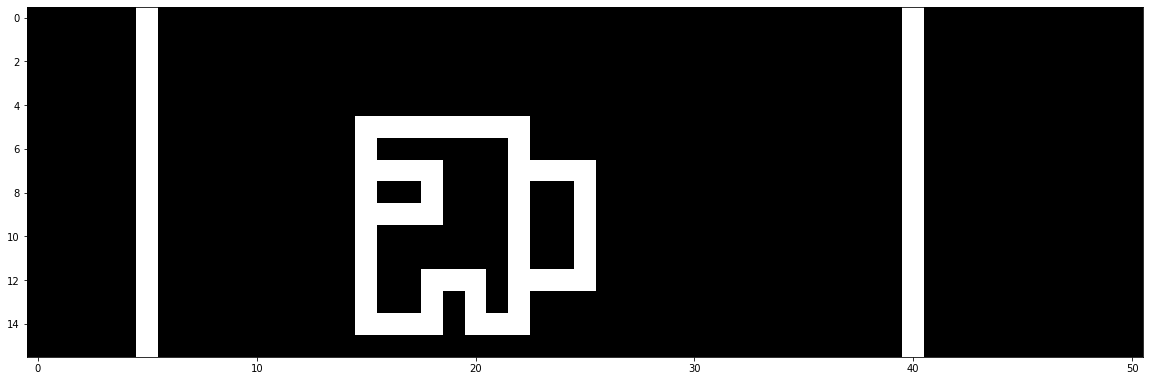

In [6]:
#explore how filter acts on image
#creating a test sample
X = np.zeros((16,51))
X[5:15,15] = 1; X[5:15,22] = 1
X[5,15:22] = 1
X[7:12,25] = 1; X[12, 22:26] = 1; X[7, 22:26] = 1
X[14, 15:18] = 1; X[14, 20:23] = 1; X[12:15, 18] = 1;  X[12:15, 20] = 1;  X[12, 18:20] = 1
X[7, 15:18] = 1;  X[7:10, 18] = 1;  X[9, 15:18] = 1; X[0:16, 40] = 1; X[0:16, 5] = 1
plt.imshow(X, cmap='gray')
#AMOGUS

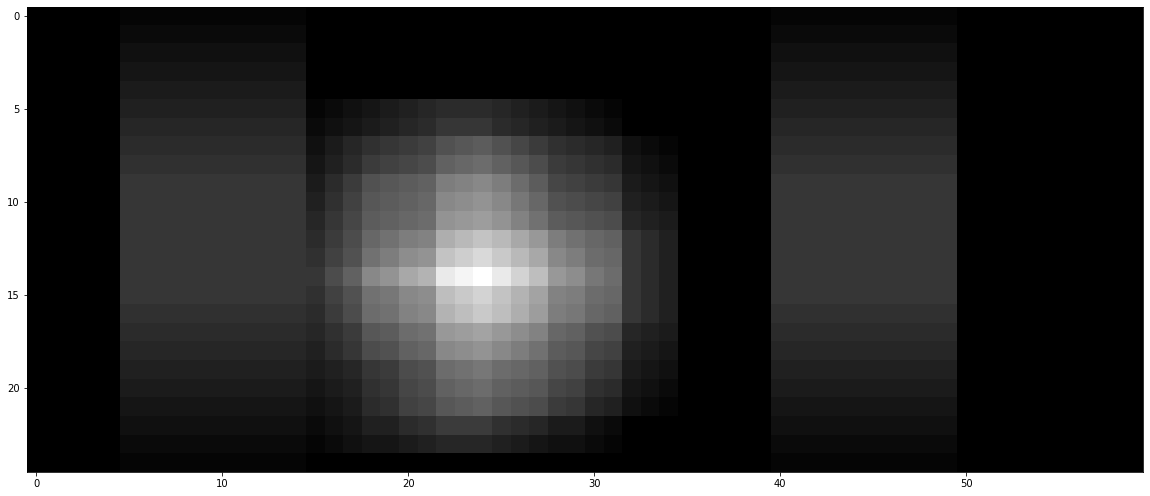

In [7]:
x = mat2vec(X)
plt.imshow(vec2mat(C @ x, (25, 60)),  cmap='gray')

In [8]:
#every bright pixel turns into a rectangle

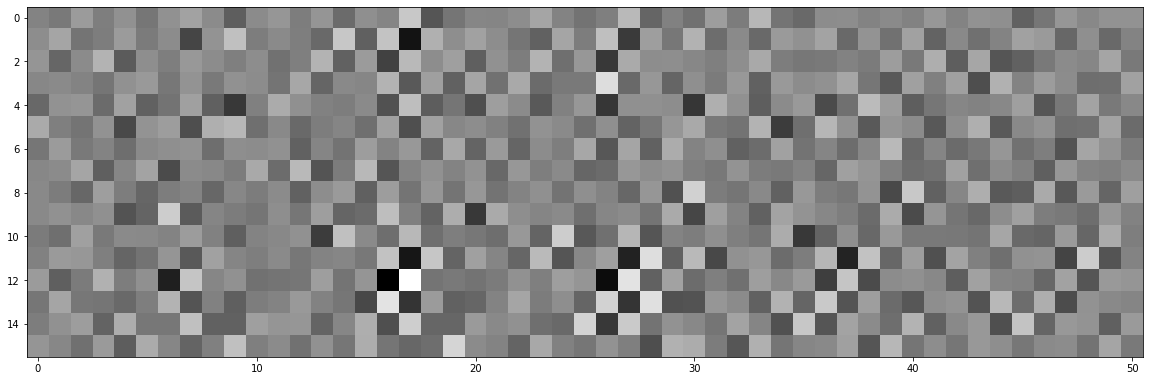

In [71]:
#naive solving for a0
a = mat2vec(A)
a0 = np.linalg.pinv(C) @ a
A0 = vec2mat(a0, (16, 51))
plt.imshow(A0,  cmap='gray')

In [72]:
u, s, vh = np.linalg.svd(C, full_matrices=False)
s.shape

(816,)

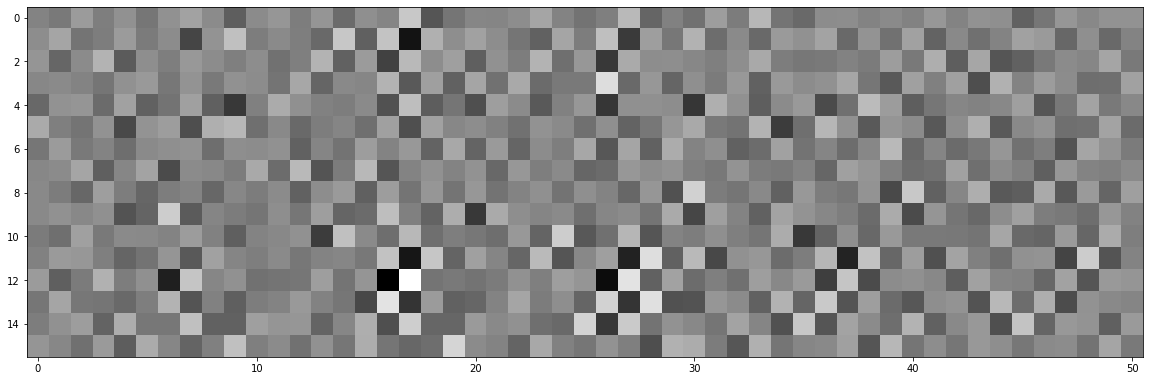

In [73]:
#full number of sing values
n = 816
s0 = np.zeros(n)
s0[:n] = s[:n]
C0 = np.dot(u, np.dot(np.diag(s0), vh))
A0_guess = vec2mat(np.linalg.pinv(C0) @ a, (16, 51))
plt.imshow(A0_guess, cmap='gray')
plt.show()

In [77]:
def reduce(n):
    s0 = np.zeros(816)
    s0[:n] = s[:n]
    C0 = np.dot(u, np.dot(np.diag(s0), vh))
    A0_guess = vec2mat(np.linalg.pinv(C0) @ a, (16, 51))
    plt.imshow(A0_guess, cmap='gray')
    plt.title(f'{n} singular values')
    plt.show()

In [80]:
sings = [10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650]

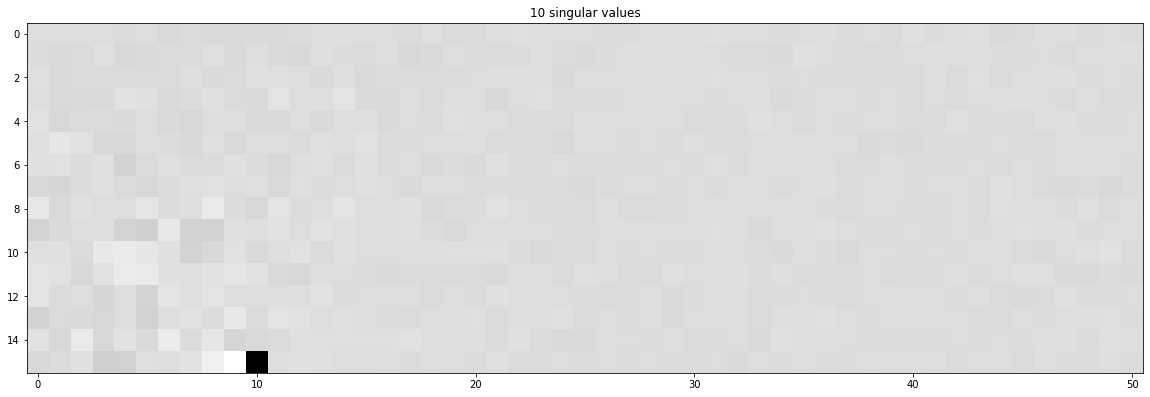

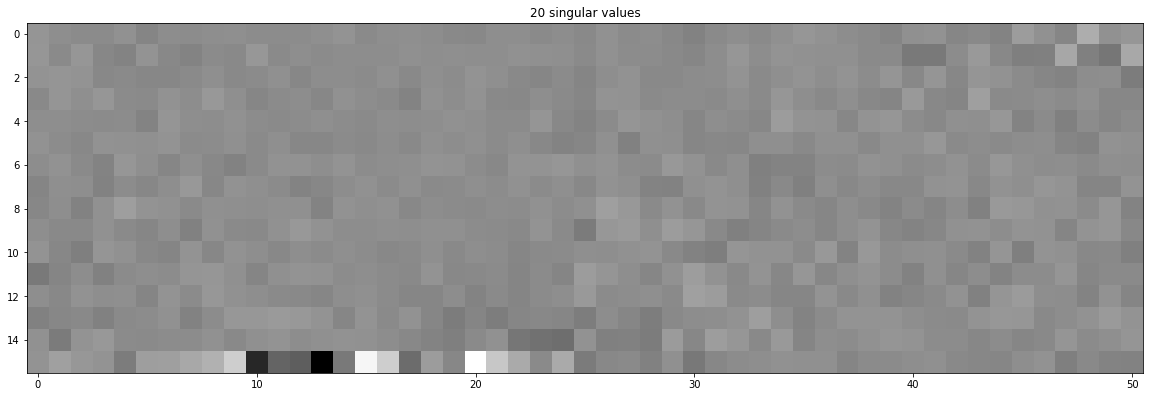

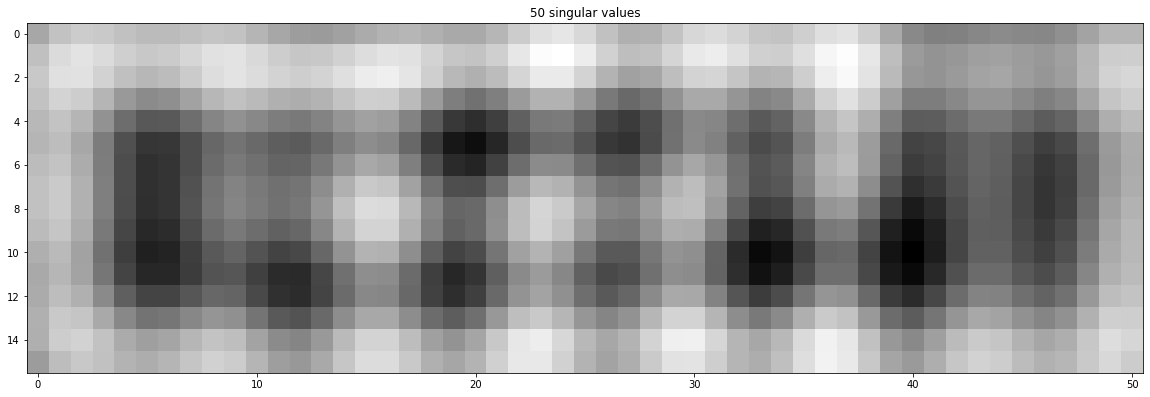

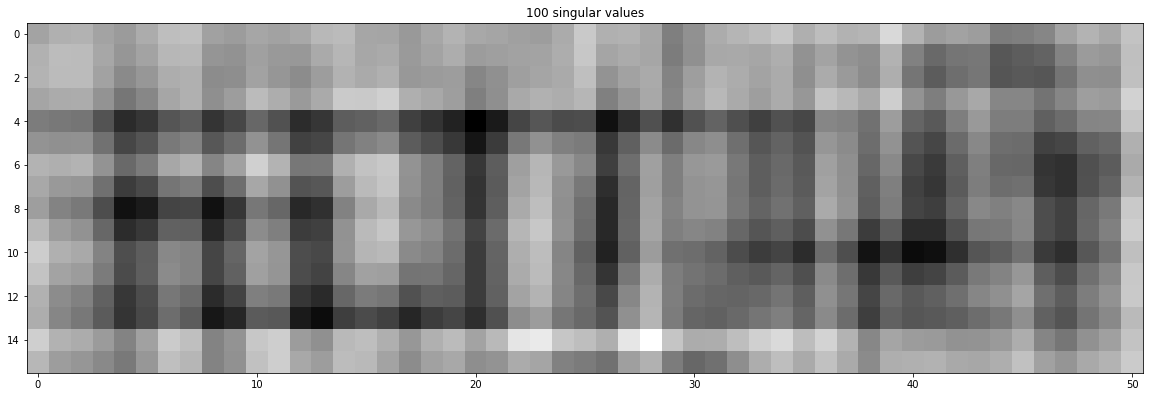

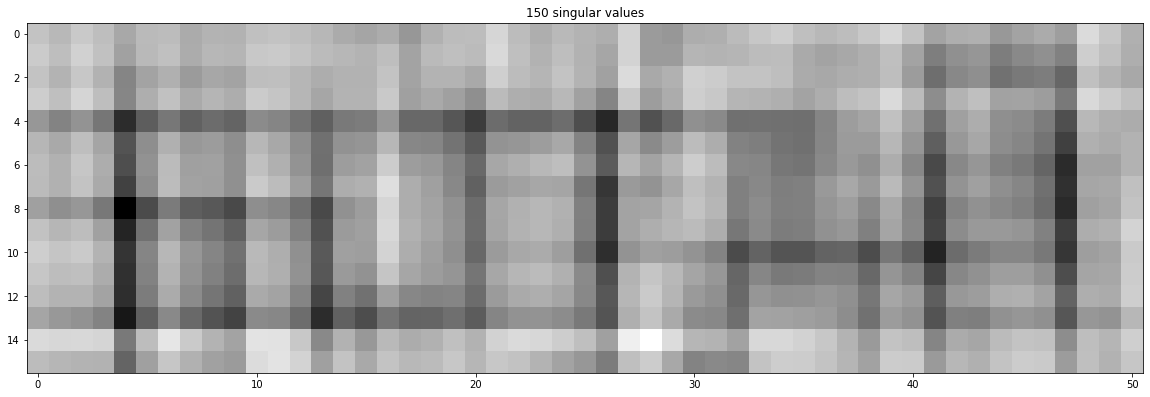

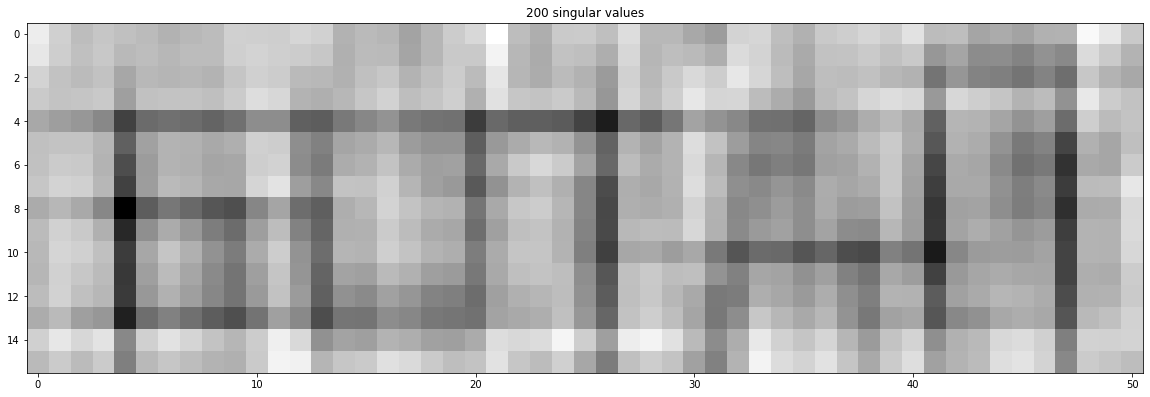

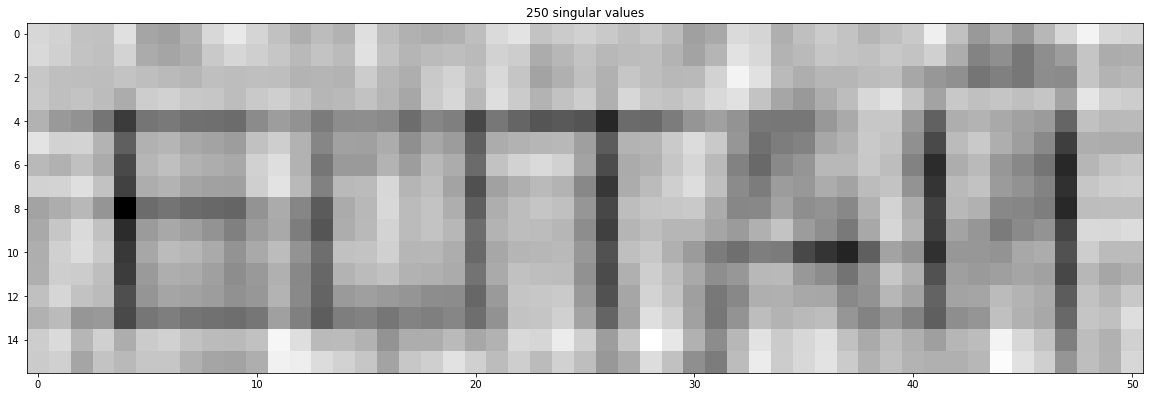

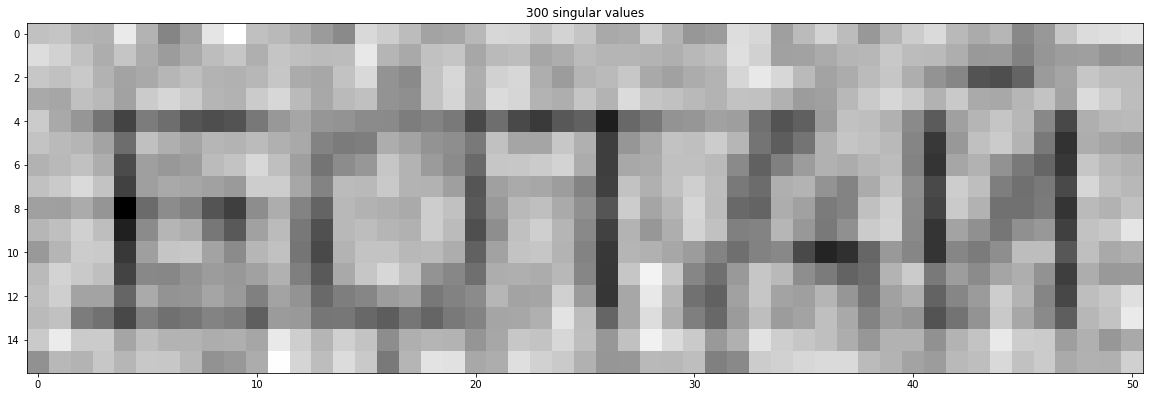

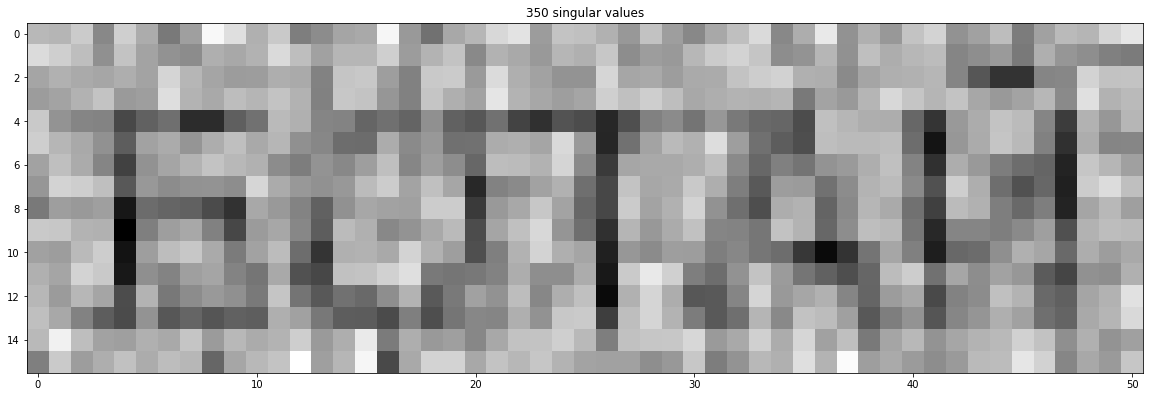

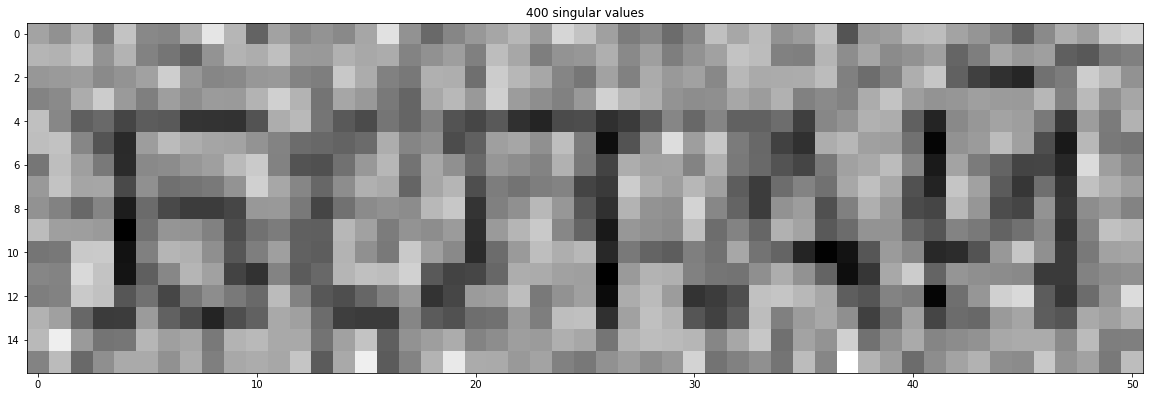

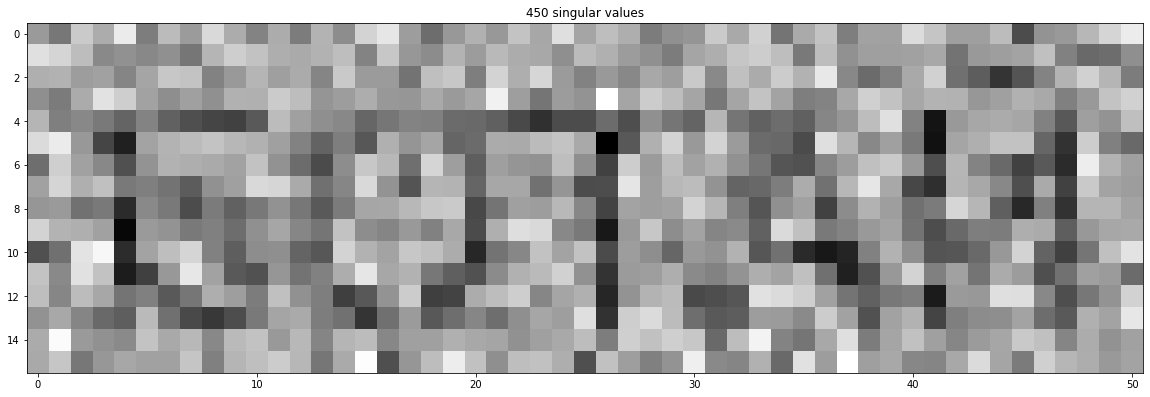

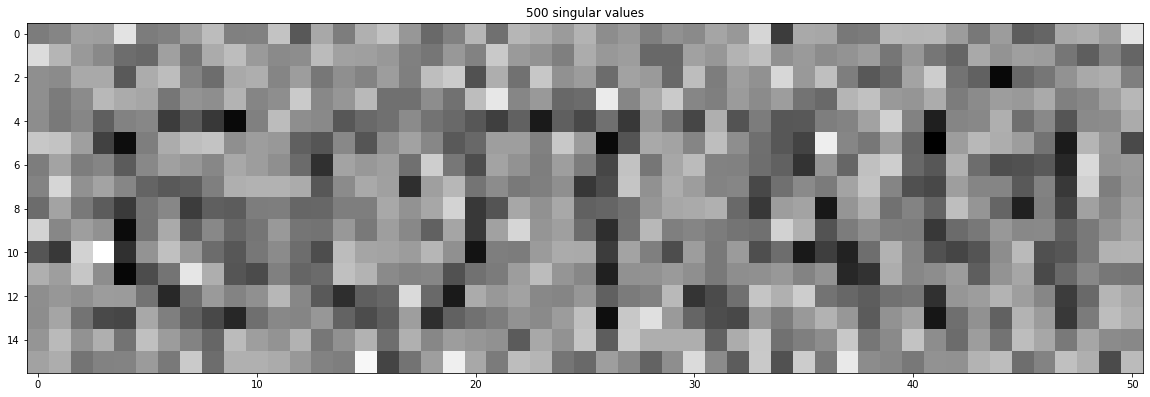

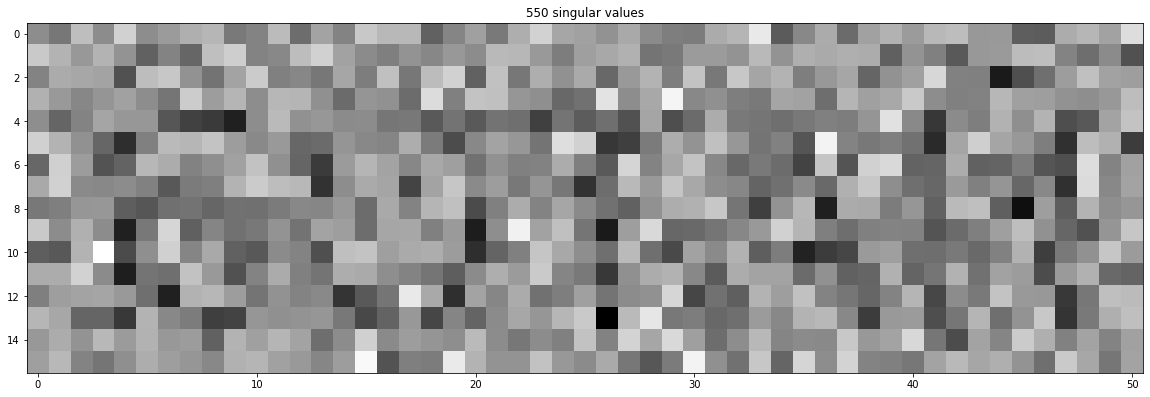

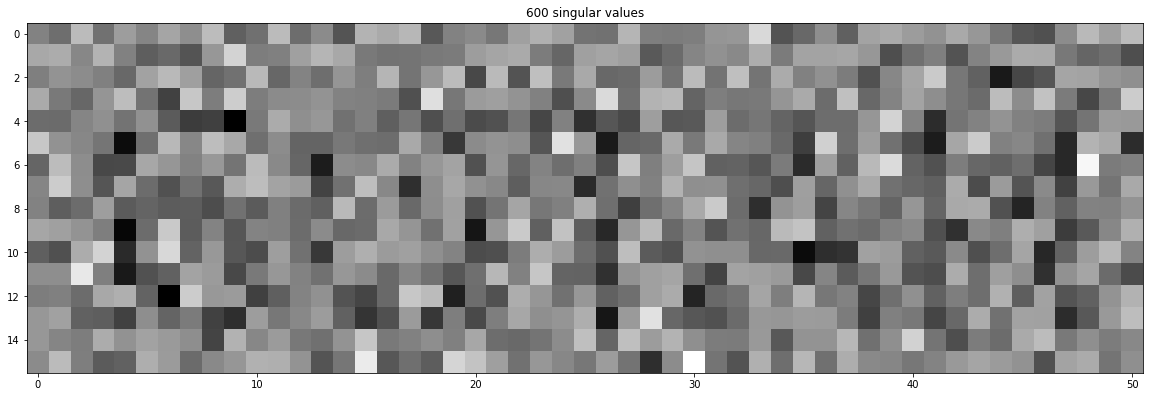

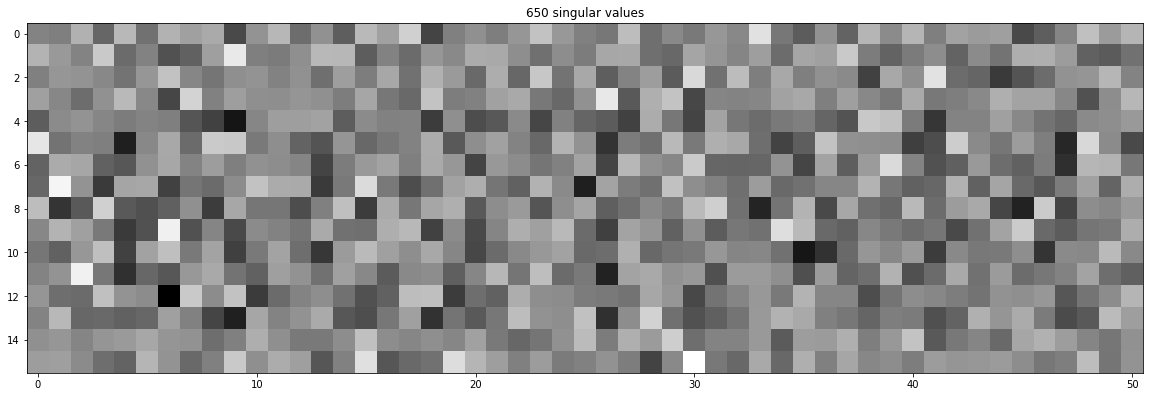

In [81]:
for val in sings:
    reduce(val)

Starting from 500 singular values image quality decreases.

## Exercise 6

In [95]:
data = np.load("data_1.npz")
r = data['r'] #points coords
p = data['p'] - 1 #number of measurements
theta = data['theta'] #angles
dr = data['dr']

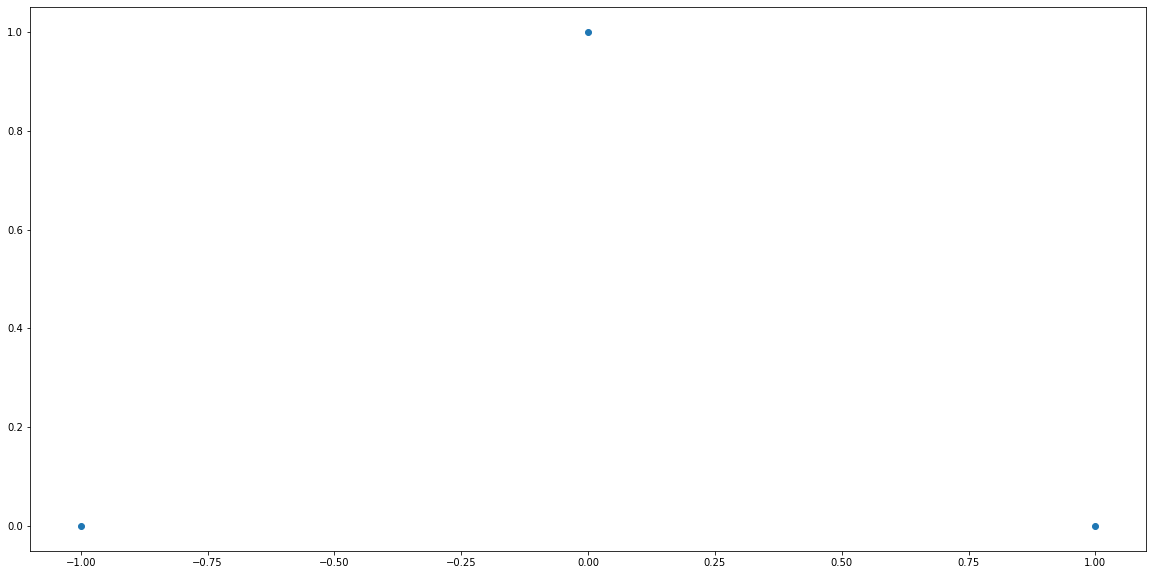

In [33]:
plt.scatter(r[:,0],r[:,1])

In [36]:
x10,y10,x20,y20,x30,y30 = s.symbols("x10,y10,x20,y20,x30,y30")
r10 = s.Matrix([x10,y10])
r20 = s.Matrix([x20,y20])
r30 = s.Matrix([x30,y30])

In [37]:
dx1,dy1,dx2,dy2,dx3,dy3 = s.symbols("dx1,dy1,dx2,dy2,dx3,dy3")
dr1 = s.Matrix([dx1,dy1])
dr2 = s.Matrix([dx2,dy2])
dr3 = s.Matrix([dx3,dy3])

In [38]:
r1 = r10 + dr1
r2 = r20 + dr2
r3 = r30 + dr3

In [41]:
ang = acos((r3-r1).dot(r2-r1)/(s.sqrt((r3-r1).dot(r3-r1))*s.sqrt((r2-r1).dot(r2-r1))))

In [82]:
#let's linearize
#zero order term, dx_i -> 0
var = (x10, y10, x20, y20, x30, y30)
subs = [[dx1, 0], [dy1, 0], [dx2, 0], [dy2, 0], [dx3, 0], [dy3, 0]]

fun = lambdify(var, ang.subs(subs))
dfun = lambdify(var, [diff(ang, v).subs(subs) for v in var])

A @ dx = b

In [83]:
m = len(theta)
n = np.prod(r.shape)
A = np.zeros((m, n))
b = np.zeros((m, 1))

In [88]:
for i in range(r.shape[0]):
    b[i] = [theta[i] - fun(*np.reshape(r[p[i]], 6))]
    A[i] = [dfun(*np.reshape(r[p[i]], 6))]
    
    
dx = np.linalg.lstsq(A, b, rcond=-1)[0]
dx = np.reshape(dx, (3, 2))

IndexError: IndexError: index 1 is out of bounds for axis 0 with size 1

In [105]:
data1 = np.load('data_2.npz')
r1 = data1['r'] #points coords
p1 = data1['p'] - 1 #number of measurements
theta1 = data1['theta'] #angles
dr1 = data1['dr']

In [111]:
r1